In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [26]:
df = pd.read_csv('../../Datasets/Lynx_Hare/data.csv', usecols=['DATE', 'HARE', 'LYNX'])
print(df)

    DATE   HARE   LYNX
0   1845  19.58  30.09
1   1846  19.60  45.15
2   1847  19.61  49.15
3   1848  11.99  39.52
4   1849  28.04  21.23
..   ...    ...    ...
86  1931  19.52   8.31
87  1932  82.11  16.01
88  1933  89.76  24.82
89  1934  81.66  29.70
90  1935  15.76  35.40

[91 rows x 3 columns]


In [27]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['HARE', 'LYNX']])
print(scaled_data)

[[0.11786543 0.35320378]
 [0.11799801 0.55094538]
 [0.1180643  0.60346639]
 [0.06755055 0.47702206]
 [0.17394763 0.23686975]
 [0.37255552 0.06867122]
 [0.48259861 0.0311187 ]
 [0.48584687 0.02481618]
 [0.57461054 0.09164916]
 [0.39429897 0.21546744]
 [0.48306265 0.39023109]
 [0.57182632 0.40953256]
 [0.44222738 0.34663866]
 [0.2014584  0.23778887]
 [0.07185946 0.13786765]
 [0.13052701 0.05856092]
 [0.18926086 0.01168592]
 [0.00251906 0.01181723]
 [1.         0.14627101]
 [0.97156115 0.45995273]
 [0.55691084 0.75617122]
 [0.26257872 0.88734244]
 [0.08584687 0.91360294]
 [0.00318197 0.51851366]
 [0.02724561 0.17331933]
 [0.05402718 0.08718487]
 [0.05727544 0.03426996]
 [0.45634736 0.02717962]
 [0.3203182  0.20640756]
 [0.32038449 0.3644958 ]
 [0.65926417 0.36751576]
 [0.63188598 0.56657038]
 [0.56155121 0.55908613]
 [0.46648989 0.53781513]
 [0.2420948  0.43513655]
 [0.05508784 0.11607143]
 [0.03937686 0.12355567]
 [0.05217103 0.19892332]
 [0.27391448 0.41951155]
 [0.33417302 0.53282563]


In [28]:
xs, ys = [], []
seq_length=3
for i in range(len(scaled_data)-seq_length):
    x = scaled_data[i:(i + seq_length)]
    xs.append(x)

    y = scaled_data[i + seq_length]
    ys.append(y)

X, y = np.array(xs), np.array(ys)
print(X)
print(y)

[[[0.11786543 0.35320378]
  [0.11799801 0.55094538]
  [0.1180643  0.60346639]]

 [[0.11799801 0.55094538]
  [0.1180643  0.60346639]
  [0.06755055 0.47702206]]

 [[0.1180643  0.60346639]
  [0.06755055 0.47702206]
  [0.17394763 0.23686975]]

 [[0.06755055 0.47702206]
  [0.17394763 0.23686975]
  [0.37255552 0.06867122]]

 [[0.17394763 0.23686975]
  [0.37255552 0.06867122]
  [0.48259861 0.0311187 ]]

 [[0.37255552 0.06867122]
  [0.48259861 0.0311187 ]
  [0.48584687 0.02481618]]

 [[0.48259861 0.0311187 ]
  [0.48584687 0.02481618]
  [0.57461054 0.09164916]]

 [[0.48584687 0.02481618]
  [0.57461054 0.09164916]
  [0.39429897 0.21546744]]

 [[0.57461054 0.09164916]
  [0.39429897 0.21546744]
  [0.48306265 0.39023109]]

 [[0.39429897 0.21546744]
  [0.48306265 0.39023109]
  [0.57182632 0.40953256]]

 [[0.48306265 0.39023109]
  [0.57182632 0.40953256]
  [0.44222738 0.34663866]]

 [[0.57182632 0.40953256]
  [0.44222738 0.34663866]
  [0.2014584  0.23778887]]

 [[0.44222738 0.34663866]
  [0.2014584  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 2)),
    Dense(2)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200, Training MSE: 0.1469, Test MSE: 0.1139
Epoch 2/200, Training MSE: 0.1385, Test MSE: 0.1068
Epoch 3/200, Training MSE: 0.1304, Test MSE: 0.1001
Epoch 4/200, Training MSE: 0.1227, Test MSE: 0.0937
Epoch 5/200, Training MSE: 0.1154, Test MSE: 0.0874
Epoch 6/200, Training MSE: 0.1082, Test MSE: 0.0815
Epoch 7/200, Training MSE: 0.1016, Test MSE: 0.0758
Epoch 8/200, Training MSE: 0.0950, Test MSE: 0.0705
Epoch 9/200, Training MSE: 0.0893, Test MSE: 0.0655
Epoch 10/200, Training MSE: 0.0835, Test MSE: 0.0609
Epoch 11/200, Training MSE: 0.0778, Test MSE: 0.0569
Epoch 12/200, Training MSE: 0.0731, Test MSE: 0.0532
Epoch 13/200, Training MSE: 0.0692, Test MSE: 0.0502
Epoch 14/200, Training MSE: 0.0655, Test MSE: 0.0476
Epoch 15/200, Training MSE: 0.0628, Test MSE: 0.0457
Epoch 16/200, Training MSE: 0.0608, Test MSE: 0.0444
Epoch 17/200, Training MSE: 0.0591, Test MSE: 0.0435
Epoch 18/200, Training MSE: 0.0584, Test MSE: 0.0428
Epoch 19/200, Training MSE: 0.0575, Test MSE: 0.0420
Ep

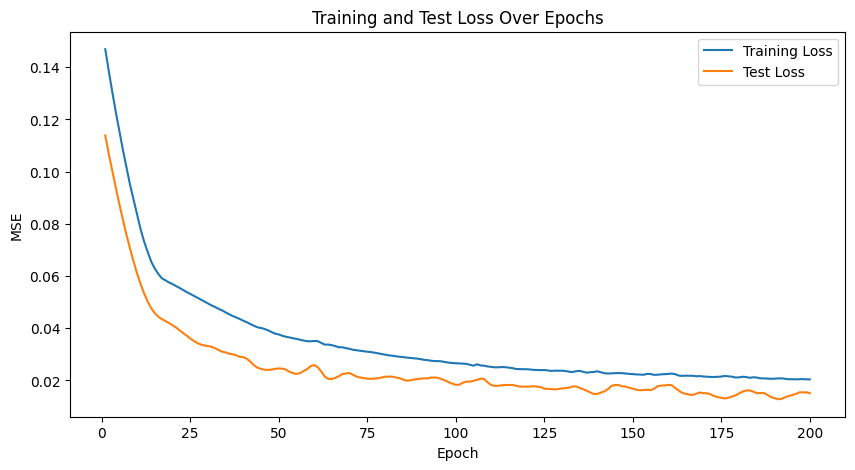

Final Test MSE: 0.015109202824532986


In [31]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=32, verbose=0)
    
    # Access losses directly from history object
    train_mse = history.history['loss'][-1]
    test_mse = history.history['val_loss'][-1]
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')

In [32]:
df = pd.read_csv('../../Datasets/study_373/top_5_373.csv', usecols=['DATE', '46670', '46982', '46504', '46571', '46888'])
print(df)

           DATE  46670  46982  46504  46571  46888
0    2008-06-08    1.0    2.0    1.0    1.0    2.0
1    2008-07-11    1.0    3.0    1.0    1.0    2.0
2    2008-09-14    2.0    6.0    2.0    1.0    1.0
3    2008-09-16    2.0    1.0    1.0    1.0    3.0
4    2008-09-22    2.0    4.0    1.0    1.0    2.0
..          ...    ...    ...    ...    ...    ...
388  2012-10-18   10.0    6.0    1.0    1.0    2.0
389  2012-10-22    8.0    6.0    1.0    1.0    3.0
390  2012-10-28    3.0    1.0    1.0    1.0    2.0
391  2012-11-08    2.0    7.0    1.0    1.0    2.0
392  2012-11-09    2.0    1.0    1.0    1.0    1.0

[393 rows x 6 columns]


In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['46670', '46982',  '46504',  '46571',  '46888']])
print(scaled_data)

[[0.         0.01694915 0.         0.         0.06666667]
 [0.         0.03389831 0.         0.         0.06666667]
 [0.02941176 0.08474576 0.07142857 0.         0.        ]
 ...
 [0.05882353 0.         0.         0.         0.06666667]
 [0.02941176 0.10169492 0.         0.         0.06666667]
 [0.02941176 0.         0.         0.         0.        ]]


In [34]:
xs, ys = [], []
seq_length=3
for i in range(len(scaled_data)-seq_length):
    x = scaled_data[i:(i + seq_length)]
    xs.append(x)

    y = scaled_data[i + seq_length]
    ys.append(y)

X, y = np.array(xs), np.array(ys)
print(X)
print(y)

[[[0.         0.01694915 0.         0.         0.06666667]
  [0.         0.03389831 0.         0.         0.06666667]
  [0.02941176 0.08474576 0.07142857 0.         0.        ]]

 [[0.         0.03389831 0.         0.         0.06666667]
  [0.02941176 0.08474576 0.07142857 0.         0.        ]
  [0.02941176 0.         0.         0.         0.13333333]]

 [[0.02941176 0.08474576 0.07142857 0.         0.        ]
  [0.02941176 0.         0.         0.         0.13333333]
  [0.02941176 0.05084746 0.         0.         0.06666667]]

 ...

 [[0.32352941 0.13559322 0.28571429 0.16666667 0.13333333]
  [0.26470588 0.08474576 0.         0.         0.06666667]
  [0.20588235 0.08474576 0.         0.         0.13333333]]

 [[0.26470588 0.08474576 0.         0.         0.06666667]
  [0.20588235 0.08474576 0.         0.         0.13333333]
  [0.05882353 0.         0.         0.         0.06666667]]

 [[0.20588235 0.08474576 0.         0.         0.13333333]
  [0.05882353 0.         0.         0.  

In [35]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 2)),
    Dense(2)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200, Training MSE: 0.1570, Test MSE: 0.1196
Epoch 2/200, Training MSE: 0.1486, Test MSE: 0.1122
Epoch 3/200, Training MSE: 0.1406, Test MSE: 0.1050
Epoch 4/200, Training MSE: 0.1329, Test MSE: 0.0978
Epoch 5/200, Training MSE: 0.1251, Test MSE: 0.0907
Epoch 6/200, Training MSE: 0.1177, Test MSE: 0.0836
Epoch 7/200, Training MSE: 0.1109, Test MSE: 0.0768
Epoch 8/200, Training MSE: 0.1036, Test MSE: 0.0704
Epoch 9/200, Training MSE: 0.0969, Test MSE: 0.0642
Epoch 10/200, Training MSE: 0.0901, Test MSE: 0.0583
Epoch 11/200, Training MSE: 0.0833, Test MSE: 0.0527
Epoch 12/200, Training MSE: 0.0769, Test MSE: 0.0474
Epoch 13/200, Training MSE: 0.0710, Test MSE: 0.0428
Epoch 14/200, Training MSE: 0.0665, Test MSE: 0.0393
Epoch 15/200, Training MSE: 0.0621, Test MSE: 0.0373
Epoch 16/200, Training MSE: 0.0597, Test MSE: 0.0363
Epoch 17/200, Training MSE: 0.0580, Test MSE: 0.0360
Epoch 18/200, Training MSE: 0.0567, Test MSE: 0.0361
Epoch 19/200, Training MSE: 0.0560, Test MSE: 0.0362
Ep

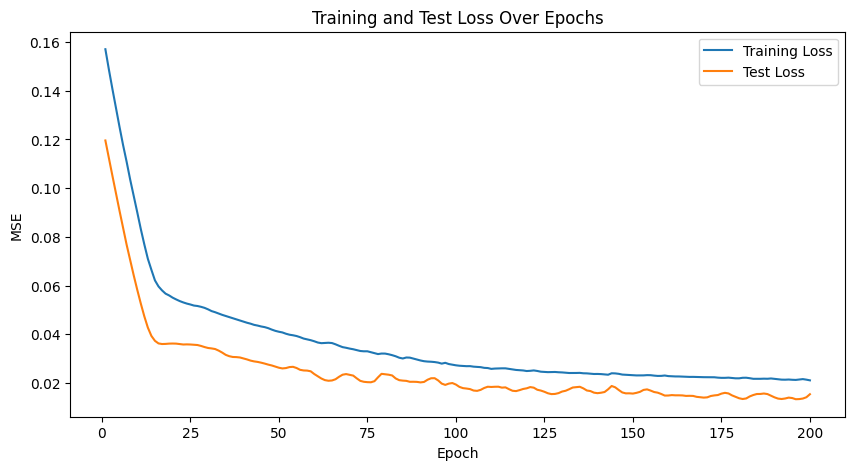

Final Test MSE: 0.015418951399624348


In [36]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=32, verbose=0)
    
    # Access losses directly from history object
    train_mse = history.history['loss'][-1]
    test_mse = history.history['val_loss'][-1]
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')

In [37]:
df = pd.read_csv('../../Datasets/study_213/top_5_213.csv', usecols=['DATE', '7058', '8572', '39601', '8901', '7730'])
print(df)

            DATE    7058   8572  39601   8901   7730
0     1963-11-14  1531.0  422.0   19.0  164.0    2.0
1     1963-12-10   437.0   94.0   17.0   97.0    1.0
2     1964-10-25   189.0   66.0   36.0   23.0  761.0
3     1964-10-29   370.0  116.0   83.0  196.0  561.0
4     1964-12-04   101.0    5.0   21.0  233.0    2.0
...          ...     ...    ...    ...    ...    ...
1510  2008-10-28   255.0   16.0  185.0   44.0   15.0
1511  2008-10-30   741.0  735.0  252.0   87.0  382.0
1512  2008-11-03   287.0  291.0   14.0   16.0    1.0
1513  2008-11-04   732.0  468.0   32.0  186.0    1.0
1514  2008-11-08    78.0    3.0  471.0    1.0   14.0

[1515 rows x 6 columns]


In [38]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['7058', '8572',  '39601',  '8901',  '7730']])
print(scaled_data)

[[1.28012048e-01 2.95293540e-02 4.61491129e-04 4.23266684e-02
  1.61227912e-05]
 [3.64792503e-02 6.52311145e-03 4.10214337e-04 2.49285900e-02
  0.00000000e+00]
 [1.57295850e-02 4.55916392e-03 8.97343862e-04 5.71280187e-03
  1.22533213e-02]
 ...
 [2.39290495e-02 2.03408852e-02 3.33299149e-04 3.89509218e-03
  0.00000000e+00]
 [6.11613119e-02 3.27558392e-02 7.94790278e-04 4.80394703e-02
  0.00000000e+00]
 [6.44243641e-03 1.40281967e-04 1.20500461e-02 0.00000000e+00
  2.09596285e-04]]


In [39]:
xs, ys = [], []
seq_length=3
for i in range(len(scaled_data)-seq_length):
    x = scaled_data[i:(i + seq_length)]
    xs.append(x)

    y = scaled_data[i + seq_length]
    ys.append(y)

X, y = np.array(xs), np.array(ys)
print(X)
print(y)

[[[1.28012048e-01 2.95293540e-02 4.61491129e-04 4.23266684e-02
   1.61227912e-05]
  [3.64792503e-02 6.52311145e-03 4.10214337e-04 2.49285900e-02
   0.00000000e+00]
  [1.57295850e-02 4.55916392e-03 8.97343862e-04 5.71280187e-03
   1.22533213e-02]]

 [[3.64792503e-02 6.52311145e-03 4.10214337e-04 2.49285900e-02
   0.00000000e+00]
  [1.57295850e-02 4.55916392e-03 8.97343862e-04 5.71280187e-03
   1.22533213e-02]
  [3.08734940e-02 8.06621309e-03 2.10234848e-03 5.06361984e-02
   9.02876306e-03]]

 [[1.57295850e-02 4.55916392e-03 8.97343862e-04 5.71280187e-03
   1.22533213e-02]
  [3.08734940e-02 8.06621309e-03 2.10234848e-03 5.06361984e-02
   9.02876306e-03]
  [8.36680054e-03 2.80563934e-04 5.12767921e-04 6.02440924e-02
   1.61227912e-05]]

 ...

 [[2.07496653e-02 3.28259802e-02 3.28171470e-03 1.94754609e-02
   3.22455824e-05]
  [2.12516734e-02 1.05211475e-03 4.71746488e-03 1.11659309e-02
   2.25719076e-04]
  [6.19143240e-02 5.14834818e-02 6.43523741e-03 2.23318619e-02
   6.14278344e-03]]

 [

In [40]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 2)),
    Dense(2)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200, Training MSE: 0.1573, Test MSE: 0.1179
Epoch 2/200, Training MSE: 0.1490, Test MSE: 0.1101
Epoch 3/200, Training MSE: 0.1407, Test MSE: 0.1026
Epoch 4/200, Training MSE: 0.1329, Test MSE: 0.0951
Epoch 5/200, Training MSE: 0.1249, Test MSE: 0.0879
Epoch 6/200, Training MSE: 0.1174, Test MSE: 0.0810
Epoch 7/200, Training MSE: 0.1095, Test MSE: 0.0743
Epoch 8/200, Training MSE: 0.1022, Test MSE: 0.0676
Epoch 9/200, Training MSE: 0.0949, Test MSE: 0.0612
Epoch 10/200, Training MSE: 0.0873, Test MSE: 0.0552
Epoch 11/200, Training MSE: 0.0814, Test MSE: 0.0497
Epoch 12/200, Training MSE: 0.0756, Test MSE: 0.0453
Epoch 13/200, Training MSE: 0.0705, Test MSE: 0.0420
Epoch 14/200, Training MSE: 0.0660, Test MSE: 0.0400
Epoch 15/200, Training MSE: 0.0633, Test MSE: 0.0390
Epoch 16/200, Training MSE: 0.0611, Test MSE: 0.0388
Epoch 17/200, Training MSE: 0.0600, Test MSE: 0.0390
Epoch 18/200, Training MSE: 0.0593, Test MSE: 0.0394
Epoch 19/200, Training MSE: 0.0585, Test MSE: 0.0395
Ep

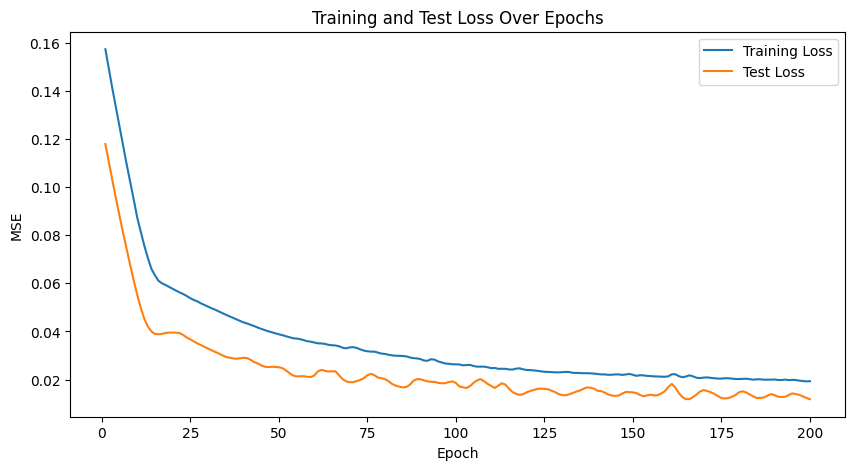

Final Test MSE: 0.011855650693178177


In [41]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=32, verbose=0)
    
    # Access losses directly from history object
    train_mse = history.history['loss'][-1]
    test_mse = history.history['val_loss'][-1]
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')